<a href="https://colab.research.google.com/github/Sarfaraz021/Agentic-AI---NoteBook/blob/main/agenticai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Part 1: Build a Basic Chatbot

In [2]:
# prompt: pip install -U langgraph

!pip install -U langgraph
!pip install langchain-openai
!pip install openai
!pip install langchain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 10.7 MB/s eta 0:00:00


In [14]:
import os
os.environ['OPENAI_API_KEY'] =
os.environ["LANGSMITH_API_KEY"]  =
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [5]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.7,
    max_tokens=1024,
    streaming=True
)


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.add_edge(START, "chatbot")

In [8]:
graph_builder.add_edge("chatbot", END)

In [9]:
graph = graph_builder.compile()

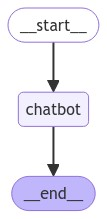

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [11]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User: what is llm all about?
Assistant: "LLM" can refer to different things depending on the context. Here are the two most common interpretations:

### 1. Master of Laws (LL.M.):
The Master of Laws (LL.M.) is a postgraduate academic degree in law. It is typically pursued by individuals who have already completed a first degree in law, such as a Bachelor of Laws (LL.B.) or Juris Doctor (J.D.). Here are some key points about the LL.M. program:

- **Specialization**: Many students pursue an LL.M. to specialize in a particular area of law, such as international law, tax law, human rights law, or corporate law.
- **Global Recognition**: An LL.M. degree is often pursued by international students who wish to gain expertise in the legal system of another country or to improve their qualifications for practicing law in a global context.
- **Duration**: The program typically lasts one year if studied full-time, but part-time options are also available.
- **Career Advancement**: An LL.M. can pro

<h1>Part 2: Enhancing the Chatbot with Tools

In [13]:
%%capture --no-stderr
%pip install -U tavily-python
%pip install -U langchain_community
!pip install -U langgraph
!pip install langchain-openai
!pip install openai
!pip install langchain


In [15]:
# import os
# os.environ["TAVILY_API_KEY"] =
# os.environ['OPENAI_API_KEY'] =
# os.environ["LANGSMITH_API_KEY"]  =
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [15]:
# from langchain_community.tools.tavily_search import TavilySearchResults

# tool = TavilySearchResults(max_results=1)
# tools = [tool]
# # tool.invoke("What's a 'node' in LangGraph?")

In [16]:
# from typing import Annotated

# from typing_extensions import TypedDict

# from langgraph.graph import StateGraph, START
# from langgraph.graph.message import add_messages
# from langchain_openai import ChatOpenAI

# class State(TypedDict):
#     messages: Annotated[list, add_messages]


# graph_builder = StateGraph(State)


# llm = ChatOpenAI(
#     model="gpt-4o",
#     temperature=0.7,
#     max_tokens=1024,
#     streaming=True
# )
# # Modification: tell the LLM which tools it can call
# llm_with_tools = llm.bind_tools(tools)


# def chatbot(state: State):
#     return {"messages": [llm_with_tools.invoke(state["messages"])]}


# graph_builder.add_node("chatbot", chatbot)

In [17]:
# import json

# from langchain_core.messages import ToolMessage


# class BasicToolNode:
#     """A node that runs the tools requested in the last AIMessage."""

#     def __init__(self, tools: list) -> None:
#         self.tools_by_name = {tool.name: tool for tool in tools}

#     def __call__(self, inputs: dict):
#         if messages := inputs.get("messages", []):
#             message = messages[-1]
#         else:
#             raise ValueError("No message found in input")
#         outputs = []
#         for tool_call in message.tool_calls:
#             tool_result = self.tools_by_name[tool_call["name"]].invoke(
#                 tool_call["args"]
#             )
#             outputs.append(
#                 ToolMessage(
#                     content=json.dumps(tool_result),
#                     name=tool_call["name"],
#                     tool_call_id=tool_call["id"],
#                 )
#             )
#         return {"messages": outputs}


# tool_node = BasicToolNode(tools=[tool])
# graph_builder.add_node("tools", tool_node)

In [25]:
# from typing import Literal


# def route_tools(
#     state: State,
# ) -> Literal["tools", "__end__"]:
#     """
#     Use in the conditional_edge to route to the ToolNode if the last message
#     has tool calls. Otherwise, route to the end.
#     """
#     if isinstance(state, list):
#         ai_message = state[-1]
#     elif messages := state.get("messages", []):
#         ai_message = messages[-1]
#     else:
#         raise ValueError(f"No messages found in input state to tool_edge: {state}")
#     if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
#         return "tools"
#     return "__end__"


# # The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "__end__" if
# # it is fine directly responding. This conditional routing defines the main agent loop.
# graph_builder.add_conditional_edges(
#     "chatbot",
#     route_tools,
#     # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
#     # It defaults to the identity function, but if you
#     # want to use a node named something else apart from "tools",
#     # You can update the value of the dictionary to something else
#     # e.g., "tools": "my_tools"
#     {"tools": "tools", "__end__": "__end__"},
# )
# # Any time a tool is called, we return to the chatbot to decide the next step
# graph_builder.add_edge("tools", "chatbot")
# graph_builder.add_edge(START, "chatbot")
# graph = graph_builder.compile()

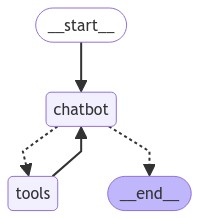

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
# from langchain_core.messages import BaseMessage

# while True:
#     user_input = input("User: ")
#     if user_input.lower() in ["quit", "exit", "q"]:
#         print("Goodbye!")
#         break
#     for event in graph.stream({"messages": [("user", user_input)]}):
#         for value in event.values():
#             if isinstance(value["messages"][-1], BaseMessage):
#                 print("Assistant:", value["messages"][-1].content)

The full code for the graph we've created in this section is reproduced below, replacing our BasicToolNode for the prebuilt ToolNode, and our route_tools condition with the prebuilt tools_condition

In [ ]:
%%capture --no-stderr
%pip install -U tavily-python
%pip install -U langchain_community
!pip install -U langgraph
!pip install langchain-openai
!pip install openai
!pip install langchain


In [9]:
from typing import Annotated

# from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

import os
os.environ["TAVILY_API_KEY"] =
os.environ['OPENAI_API_KEY'] =
os.environ["LANGSMITH_API_KEY"]  =
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.7,
    max_tokens=1024,
    streaming=True
)
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

In [10]:
from langchain_core.messages import BaseMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                print("Assistant:", value["messages"][-1].content)

<h1>Part 3: Adding Memory to the Chatbot



In [2]:
import os
os.environ["TAVILY_API_KEY"] =
os.environ['OPENAI_API_KEY'] =
os.environ["LANGSMITH_API_KEY"]  =
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [4]:
from typing import Annotated

# from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.checkpoint.sqlite import SqliteSaver

memory = SqliteSaver.from_conn_string(":memory:")

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=1)
tools = [tool]
# llm = ChatAnthropic(model="claude-3-haiku-20240307")
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.7,
    max_tokens=1024,
    streaming=True
)
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile(checkpointer=memory)

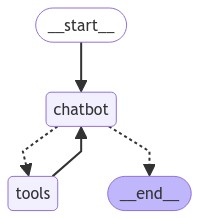

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
config = {"configurable": {"thread_id": "67"}}

In [11]:
user_input = "Remember my name is gunnu"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name is gunnu
================================== Ai Message ==================================

Got it, Gunnu! If you have any other questions or need further assistance, just let me know.


In [12]:
user_input = "what was my first query"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what was my first query
================================== Ai Message ==================================

Your first query was: "Remember my name is gunnu?"
